## Import necessary libraries

First, several libraries will need to be imported to conduct the analysis:
1. **Pandas** - a fast, powerful, flexible and easy to use open source data analysis and manipulation tool


2. **NumPy** - allows for high-level mathematical computational functions


3. **Matplotlib + Seaborn** - enables powerful plotting and visualization tools 

In [1]:
import pandas as pd
import numpy as np

pd.options.display.max_columns = 100

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sb

In [2]:
bb_df = pd.read_csv('breaking-bad.csv')

bb_df.head()

,season,episode,title,year,votes,rating,us-viewers
0,1,1,Pilot,2008,23970,9.0,1.41
1,1,2,Cat's in the Bag...,2008,17267,8.7,1.49
2,1,3,...And the Bag's in the River,2008,16719,8.8,1.08
3,1,4,Cancer Man,2008,16211,8.3,1.09
4,1,5,Gray Matter,2008,15896,8.4,0.97


In [3]:
title_df = bb_df.copy()
del title_df['episode']
del title_df['votes']
del title_df['season']
del title_df['us-viewers']
del title_df['year']

epidsodes_df = bb_df.copy()
del epidsodes_df['votes']
del epidsodes_df['season']
del epidsodes_df['us-viewers']
del epidsodes_df['year']
del epidsodes_df['title']
#del epidsodes_df['episode']


Text(0, 0.5, 'Rating')

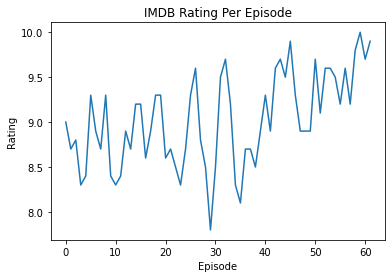

In [4]:
episode_plot = sb.lineplot(y="rating", x=epidsodes_df.index,data=epidsodes_df)
episode_plot.set_title('IMDB Rating Per Episode')
episode_plot.set_xlabel('Episode')
episode_plot.set_ylabel('Rating')

In [5]:
title_df.sort_values("rating",ascending=False)

,title,rating
59,Ozymandias,10.0
61,Felina,9.9
45,Face Off,9.9
58,To'hajiilee,9.8
60,Granite State,9.7
...,...,...
10,Down,8.3
34,Thirty-Eight Snub,8.3
3,Cancer Man,8.3
35,Open House,8.1


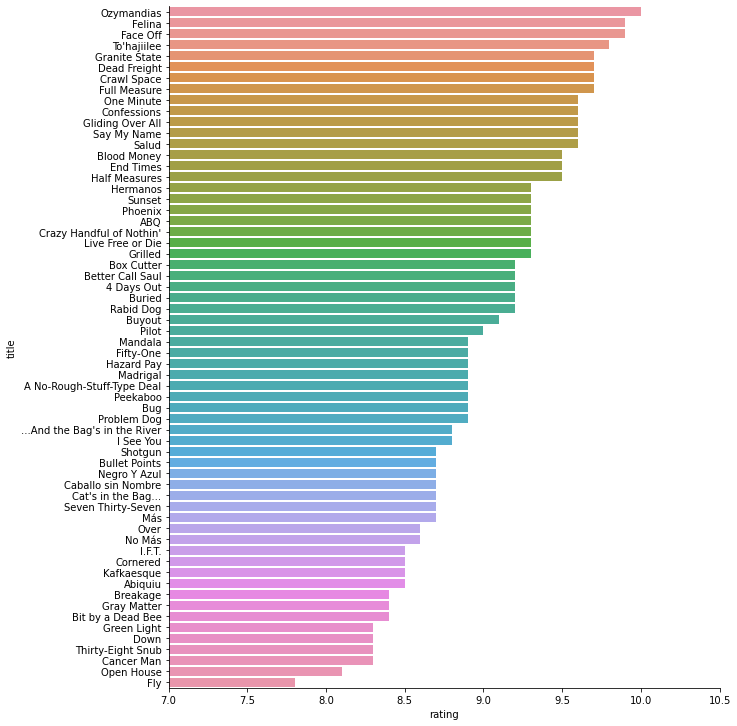

In [6]:
title_plot = sb.catplot(y="title", x="rating",data=title_df.sort_values("rating",ascending=False),kind="bar",height=10)
title_plot.set(xlim=(7))

In [7]:
season_df = bb_df.groupby("season").agg({"rating":np.mean}).sort_values("rating",ascending=False)
season_df = season_df.reset_index()
season_df


,season,rating
0,5,9.431250
1,4,9.023077
2,2,8.861538
3,3,8.807692
4,1,8.771429


[(8.0, 9.9028125)]

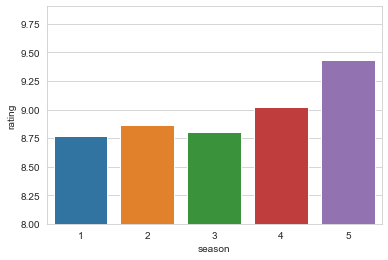

In [8]:
sb.set_style("whitegrid")
ax = sb.barplot(x="season", y="rating", data=season_df)
ax.set(ylim=(8))